In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from mpl_toolkits.mplot3d import Axes3D
from keras.regularizers import l2
import seaborn as sns
import time

# Editing the data

In [2]:
!gdown 1sukAZPeouBnaMaa_NndiV2cWbwbE9fx3
data=pd.read_csv('/content/Boiler_emulator_dataset.txt',delimiter=",")
data.head()

Downloading...
From: https://drive.google.com/uc?id=1sukAZPeouBnaMaa_NndiV2cWbwbE9fx3
To: /content/Boiler_emulator_dataset.txt
100% 1.34M/1.34M [00:00<00:00, 62.2MB/s]


Fuel_Mdot  Tair  Treturn     Tsupply  Water_Mdot Condition      Class
0          1   283    333.0  363.574744         3.0    %=0.05       Lean
1          1   283    333.0  362.349517         3.0     %=0.1    Nominal
2          1   283    333.0  361.216941         3.0    %=0.15  ExcessAir
3          1   283    333.0  360.166890         3.0    %=0.20  ExcessAir
4          1   283    333.0  359.190662         3.0    %=0.25  ExcessAir

In [3]:
replacements = {'Nominal': 0, 'Lean': 1, 'ExcessAir': 2, 'Fouling': 3,'Scaling' : 4,'%=0.05' : 0.05, '%=0.1': 0.1, '%=0.15': 0.15,
                '%=0.20': 0.2, '%=0.25' : 0.25, '%=0.3': 0.3, '%=0.35': 0.35, '%=0.40': 0.4,  '%=0.45': 0.45, '%=0.50': 0.5, 'F = 0.01': 0.01,
                'F = 0.06': 0.06, 'F = 0.11': 0.11, 'F = 0.16': 0.16, 'F = 0.21': 0.21, 'F = 0.26': 0.26, 'F = 0.31': 0.31, 'F = 0.36': 0.36,
                'F = 0.41': 0.41, 'F = 0.46': 0.46, 'S = 0.01': 0.01,'S = 0.06': 0.06, 'S = 0.11': 0.11, 'S = 0.16': 0.16, 'S = 0.21': 0.21,
                'S = 0.26': 0.26, 'S = 0.31': 0.31, 'S = 0.36': 0.36,'S = 0.41': 0.41, 'S = 0.46': 0.46 }

data=data.replace(replacements)
data.to_csv('/content/data.csv', index=False)

* Labeling

In [4]:
normal=data.values[data['Class'].values==0]
normal=normal[:,0:6]
y0=np.zeros(len(normal))
lean=data.values[data["Class"].values==1]
lean=lean[:,0:6]
y1=np.ones(len(lean))
excess_air=data.values[data["Class"].values==2]
excess_air=excess_air[:,0:6]
y2=2*np.ones(len(excess_air))
fouling=data.values[data["Class"].values==3]
fouling=fouling[:,0:6]
y3=3*np.ones(len(fouling))
scaling=data.values[data["Class"].values==4]
scaling=scaling[:,0:6]
y4=4*np.ones(len(scaling))

In [5]:
X=np.concatenate([normal, lean, excess_air, fouling, scaling])
y=np.concatenate([y0, y1, y2, y3, y4])

* Filling nan/null with mean

In [6]:
df = pd.DataFrame(X)
df.fillna(df.mean(), inplace=True)
X = df.values

* The correlation

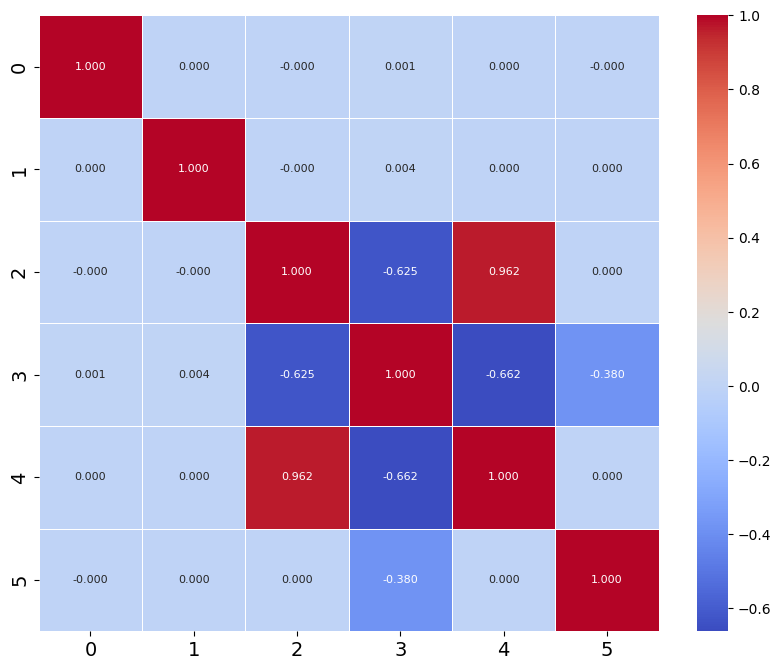

In [ ]:
corrM = df.corr()
plt.figure(figsize=(10,8))
import seaborn as sn
sn.heatmap(corrM, annot=True ,cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, fmt='.3f', yticklabels=corrM.columns)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# t-SNE

In [ ]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

t=TSNE(n_components=3,random_state=42)
X_embed=t.fit_transform(X)

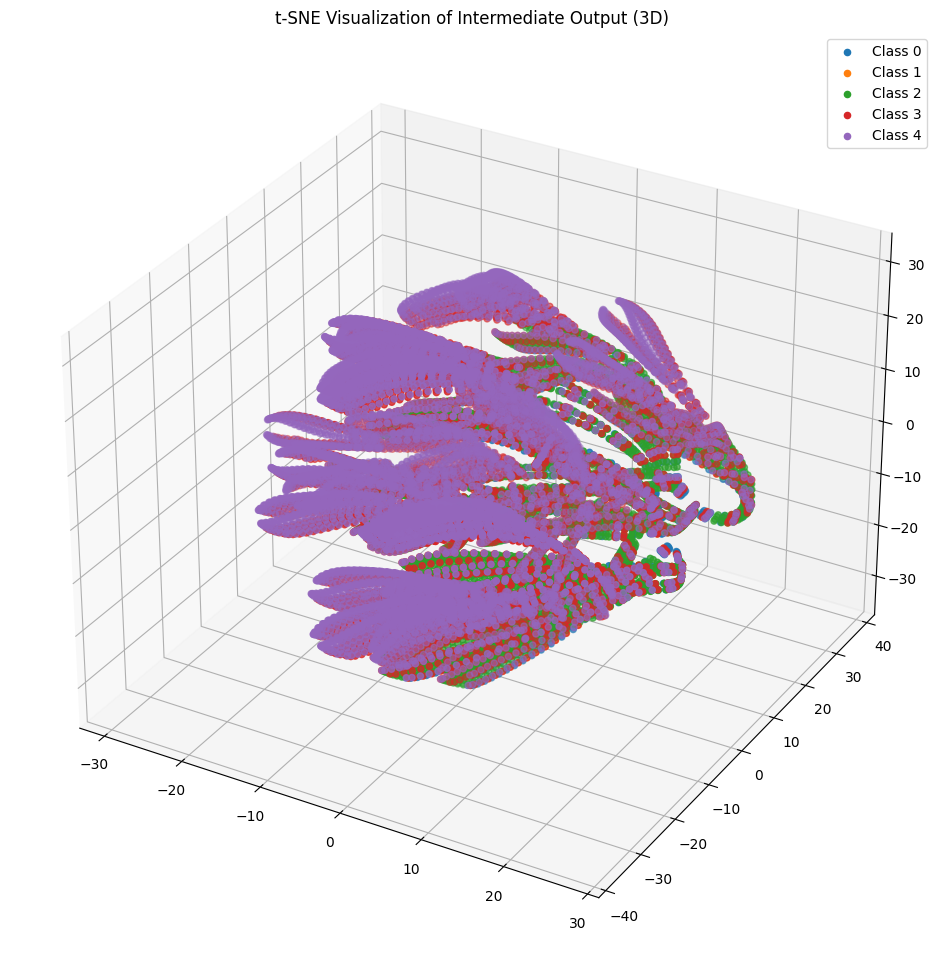

In [ ]:
# Create a 3D plot
# Plot the t-SNE results in 3D
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

for i in range(5):
    ax.scatter(X_embed[y == i, 1], X_embed[y == i, 0], X_embed[y == i, 2], label=f'Class {i}')

ax.set_title('t-SNE Visualization of Intermediate Output (3D)')
ax.legend()
plt.show()

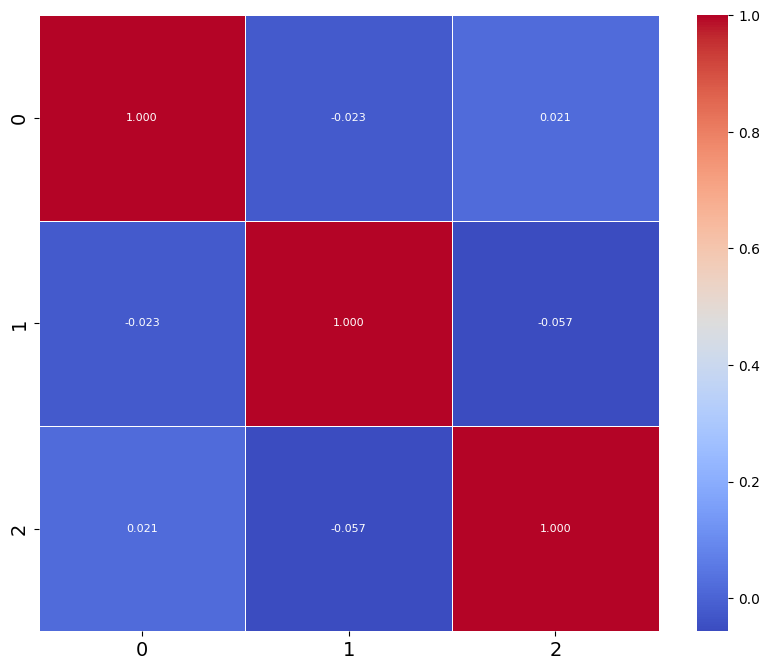

In [ ]:
x_embeded= pd.DataFrame(X_embed)
corrM = x_embeded.corr()
plt.figure(figsize=(10,8))
import seaborn as sn
sn.heatmap(corrM, annot=True ,cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, fmt='.3f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# AE

* 3 features output

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

input_dim = X_train.shape[1]

encoding_dim = 3

np.random.seed(42)
tf.random.set_seed(42)

# Define the autoencoder model
input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation='relu')(input_layer)
encoder = BatchNormalization()(encoder)
encoder = Dense(32, activation='relu')(encoder)
encoder = BatchNormalization()(encoder)
encoder = Dense(16, activation='relu')(encoder)
encoder = BatchNormalization()(encoder)
encoder = Dense(8, activation='relu')(encoder)
encoder = BatchNormalization()(encoder)
encoder = Dense(encoding_dim, activation='relu')(encoder)

decoder = Dense(8, activation='relu')(encoder)
decoder = BatchNormalization()(decoder)
decoder = Dense(16, activation='relu')(encoder)
decoder = BatchNormalization()(decoder)
decoder = Dense(32, activation='relu')(encoder)
decoder = BatchNormalization()(decoder)
decoder = Dense(64, activation='relu')(decoder)
decoder = BatchNormalization()(decoder)
decoder = Dense(input_dim, activation='linear')(decoder)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

import keras
opt = keras.optimizers.Adam(learning_rate=0.001)
# Compile the model
autoencoder.compile(optimizer=opt, loss='mean_squared_error')

start_time = time.time()
# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=70, batch_size=64, validation_data=(X_test, X_test))

# Calculate the elapsed time
end_time = time.time()
training_time = end_time - start_time
print("Training Time: {:.2f} seconds".format(training_time))

# Get the encoded representation of the data
encoder_model_3 = Model(inputs=input_layer, outputs=encoder)
encoded_data_3 = encoder_model_3.predict(X)


Epoch 1/70
299/299 [==============================] - 4s 8ms/step - loss: 50725.8320 - val_loss: 47038.3203
Epoch 2/70
299/299 [==============================] - 2s 7ms/step - loss: 42069.5898 - val_loss: 34188.7188
Epoch 3/70
299/299 [==============================] - 2s 7ms/step - loss: 28460.6992 - val_loss: 20472.5195
Epoch 4/70
299/299 [==============================] - 2s 7ms/step - loss: 15269.2246 - val_loss: 9843.7627
Epoch 5/70
299/299 [==============================] - 3s 9ms/step - loss: 6187.5913 - val_loss: 3182.6829
Epoch 6/70
299/299 [==============================] - 2s 8ms/step - loss: 1797.7811 - val_loss: 739.6802
Epoch 7/70
299/299 [==============================] - 2s 7ms/step - loss: 372.9955 - val_loss: 108.6848
Epoch 8/70
299/299 [==============================] - 2s 7ms/step - loss: 62.2204 - val_loss: 34.4045
Epoch 9/70
299/299 [==============================] - 2s 7ms/step - loss: 10.5106 - val_loss: 4.5252
Epoch 10/70
299/299 [==============================

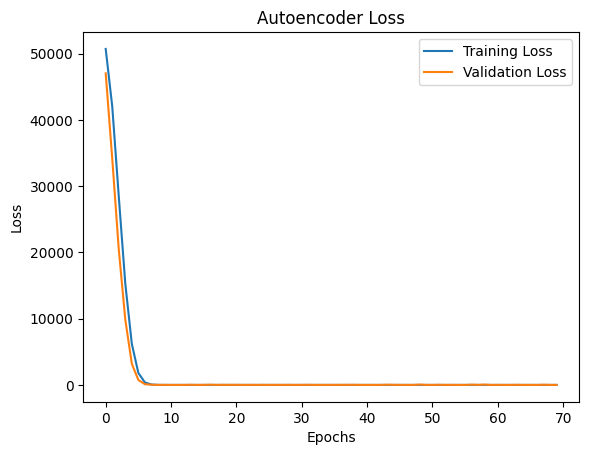

In [ ]:
# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


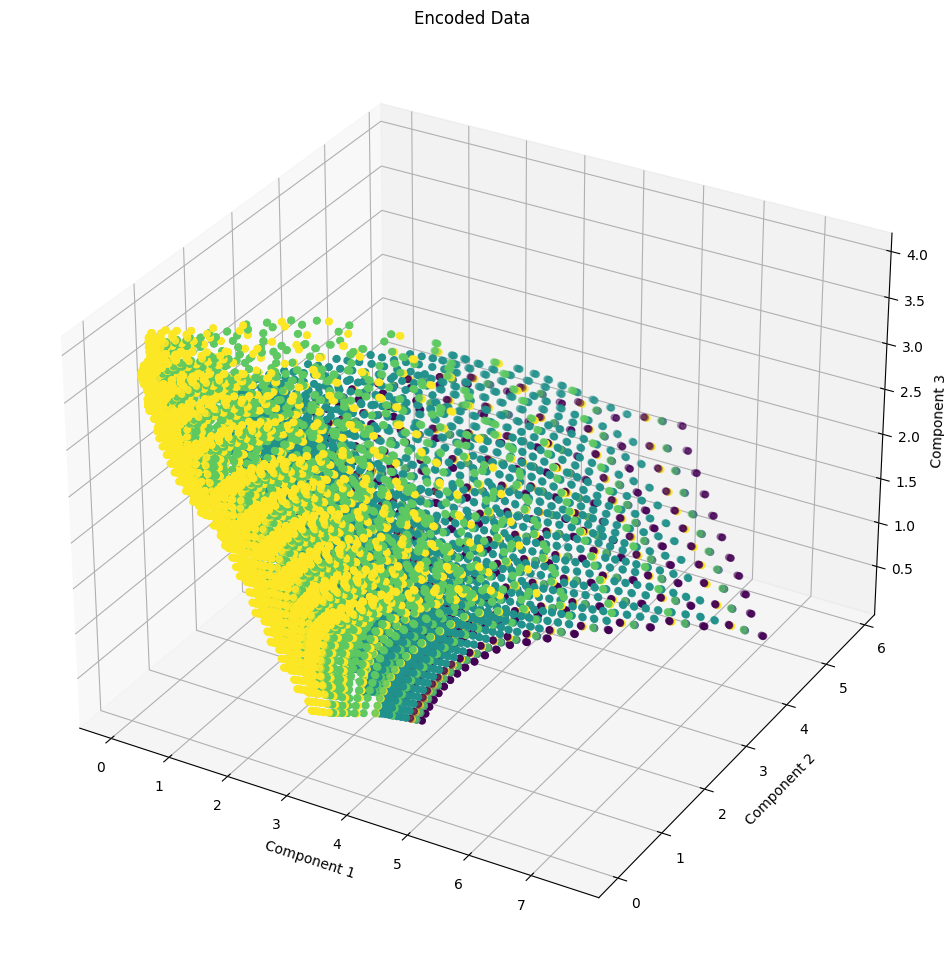

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(encoded_data_3[:, 0], encoded_data_3[:, 1], encoded_data_3[:, 2], c=y, cmap='viridis')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('Encoded Data')
plt.show()

* 4 features output

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

input_dim = X_train.shape[1]

encoding_dim = 4

np.random.seed(42)
tf.random.set_seed(42)


# Define the autoencoder model
input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation='relu')(input_layer)
encoder = BatchNormalization()(encoder)
encoder = Dense(32, activation='relu')(encoder)
encoder = BatchNormalization()(encoder)
encoder = Dense(16, activation='relu')(encoder)
encoder = BatchNormalization()(encoder)
encoder = Dense(8, activation='relu')(encoder)
encoder = BatchNormalization()(encoder)
encoder = Dense(encoding_dim, activation='relu')(encoder)

decoder = Dense(8, activation='relu')(encoder)
decoder = BatchNormalization()(decoder)
decoder = Dense(16, activation='relu')(encoder)
decoder = BatchNormalization()(decoder)
decoder = Dense(32, activation='relu')(encoder)
decoder = BatchNormalization()(decoder)
decoder = Dense(64, activation='relu')(decoder)
decoder = BatchNormalization()(decoder)
decoder = Dense(input_dim, activation='linear')(decoder)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

import keras
opt = keras.optimizers.Adam(learning_rate=0.008)
# Compile the model
autoencoder.compile(optimizer=opt, loss='mean_squared_error')

start_time = time.time()

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=64, validation_data=(X_test, X_test))

# Calculate the elapsed time
end_time = time.time()
training_time = end_time - start_time
print("Training Time: {:.2f} seconds".format(training_time))

# Get the encoded representation of the data
encoder_model_4 = Model(inputs=input_layer, outputs=encoder)
encoded_data_4 = encoder_model_4.predict(X)


Epoch 1/50
299/299 [==============================] - 4s 8ms/step - loss: 19641.4863 - val_loss: 465.3369
Epoch 2/50
299/299 [==============================] - 2s 7ms/step - loss: 1.9013 - val_loss: 24.8610
Epoch 3/50
299/299 [==============================] - 2s 7ms/step - loss: 0.9178 - val_loss: 14.4340
Epoch 4/50
299/299 [==============================] - 3s 10ms/step - loss: 0.8583 - val_loss: 57.5317
Epoch 5/50
299/299 [==============================] - 2s 7ms/step - loss: 0.8617 - val_loss: 184.8465
Epoch 6/50
299/299 [==============================] - 2s 7ms/step - loss: 0.7838 - val_loss: 80.0713
Epoch 7/50
299/299 [==============================] - 2s 7ms/step - loss: 0.7448 - val_loss: 17.1173
Epoch 8/50
299/299 [==============================] - 5s 17ms/step - loss: 0.7388 - val_loss: 15.7239
Epoch 9/50
299/299 [==============================] - 5s 16ms/step - loss: 0.7244 - val_loss: 28.6553
Epoch 10/50
299/299 [==============================] - 5s 15ms/step - loss: 0.7297

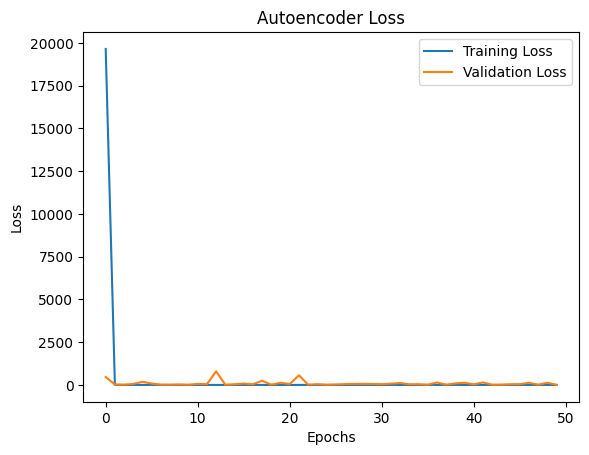

In [ ]:
# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


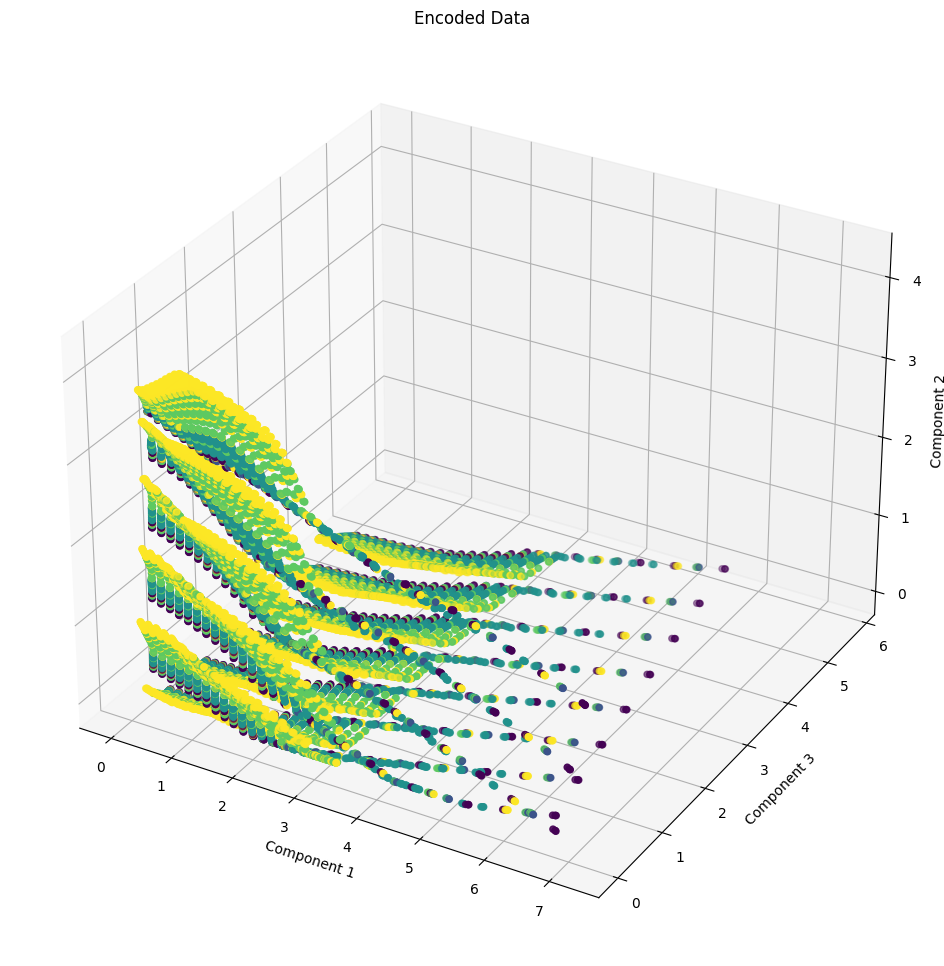

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(encoded_data_4[:, 0], encoded_data_4[:, 1], encoded_data_4[:, 2], c=y, cmap='viridis')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 3')
ax.set_zlabel('Component 2')
plt.title('Encoded Data')
plt.show()

# PCA

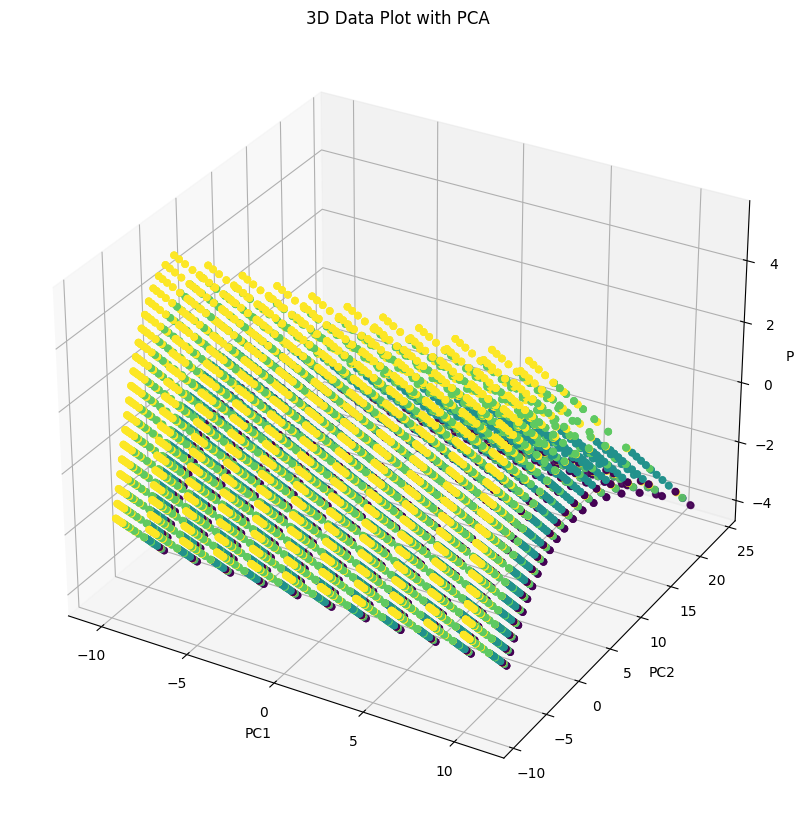

In [ ]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
# print(X_pca.shape)

# Create a 3D plot
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y)

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Data Plot with PCA')

# Show the plot
plt.show()


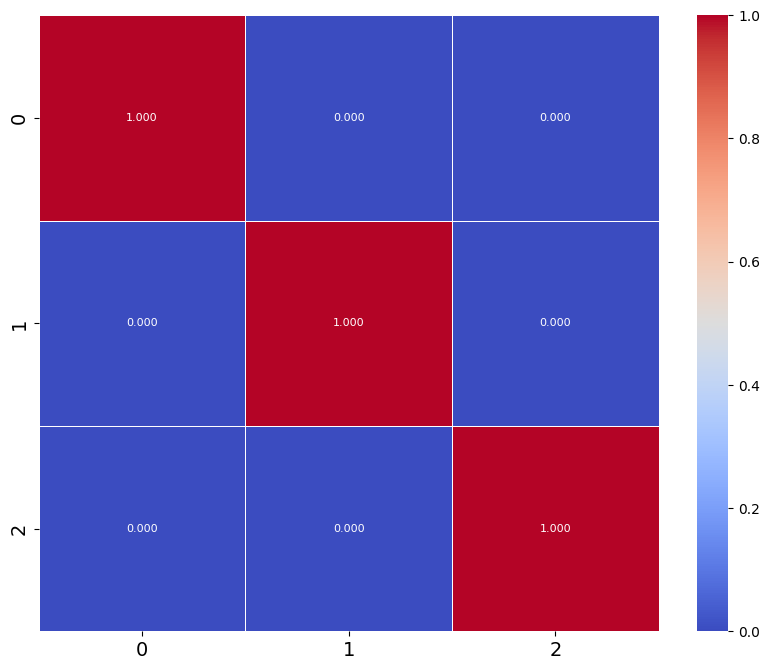

In [ ]:
x_embeded= pd.DataFrame(X_pca)
corrM = x_embeded.corr()
plt.figure(figsize=(10,8))
import seaborn as sn
sn.heatmap(corrM, annot=True ,cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, fmt='.3f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# LDA

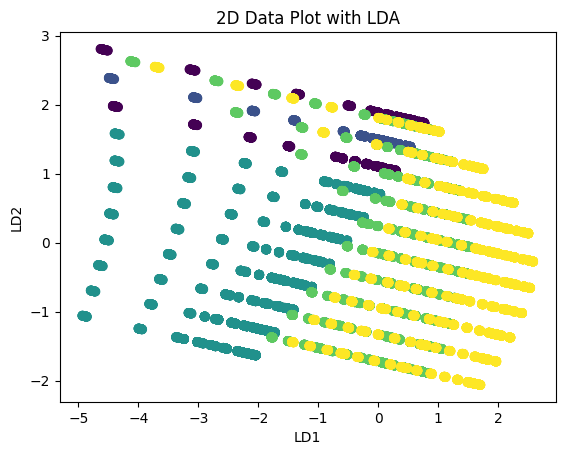

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Create a 2D plot
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('2D Data Plot with LDA')
plt.show()


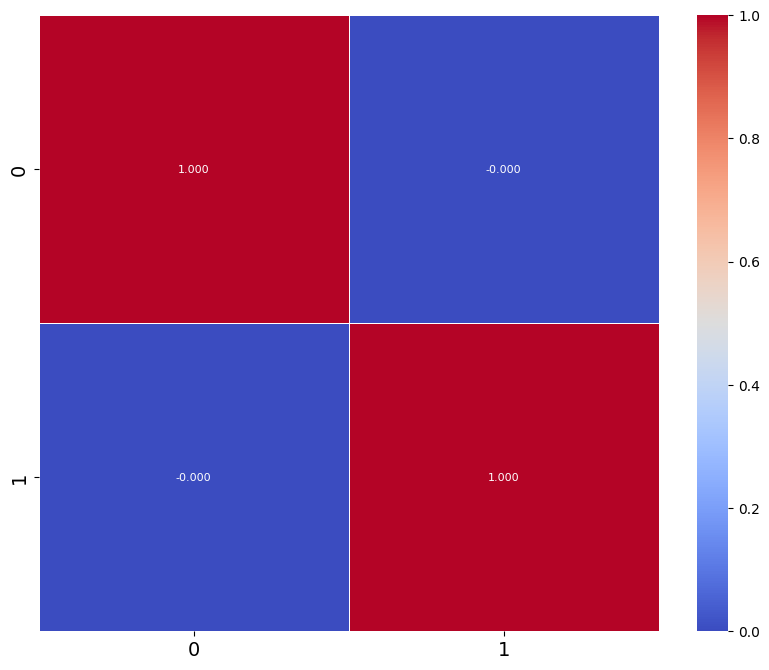

In [ ]:
x_embeded= pd.DataFrame(X_lda)
corrM = x_embeded.corr()
plt.figure(figsize=(10,8))
import seaborn as sn
sn.heatmap(corrM, annot=True ,cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, fmt='.3f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Comparing all

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculate silhouette score
silhouette = silhouette_score(X, y)
print("Silhouette Score of main data:", silhouette)

silhouette = silhouette_score(X_embed, y)
print("Silhouette Score of tsne output data:", silhouette)

silhouette = silhouette_score(encoded_data_3, y)
print("Silhouette Score of 3 features AE output data:", silhouette)

silhouette = silhouette_score(encoded_data_4, y)
print("Silhouette Score of 4 features AE output data:", silhouette)

silhouette = silhouette_score(X_pca, y)
print("Silhouette Score of pca output data:", silhouette)

silhouette = silhouette_score(X_lda, y)
print("Silhouette Score of lda output data:", silhouette)


print()
# Calculate Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(X, y)
print("Calinski-Harabasz Index of main data:", calinski_harabasz)

calinski_harabasz = calinski_harabasz_score(X_embed, y)
print("Calinski-Harabasz Index of tsne output data:", calinski_harabasz)

calinski_harabasz = calinski_harabasz_score(encoded_data_3, y)
print("Calinski-Harabasz Index of 3 features AE output data:", calinski_harabasz)

calinski_harabasz = calinski_harabasz_score(encoded_data_4, y)
print("Calinski-Harabasz Index of 4 features AE output data:", calinski_harabasz)

calinski_harabasz = calinski_harabasz_score(X_pca, y)
print("Calinski-Harabasz Index of pca output data:", calinski_harabasz)

calinski_harabasz = calinski_harabasz_score(X_lda, y)
print("Calinski-Harabasz Index of lda output data:", calinski_harabasz)

print()

# Calculate Davies-Bouldin index
davies_bouldin = davies_bouldin_score(X, y)
print("Davies-Bouldin Index of main data:", davies_bouldin)

davies_bouldin = davies_bouldin_score(X_embed, y)
print("Davies-Bouldin Index of tsne output data:", davies_bouldin)

davies_bouldin = davies_bouldin_score(encoded_data_3, y)
print("Davies-Bouldin Index of 3 features AE output data:", davies_bouldin)

davies_bouldin = davies_bouldin_score(encoded_data_4, y)
print("Davies-Bouldin Index of 4 features AE output data:", davies_bouldin)

davies_bouldin = davies_bouldin_score(X_pca, y)
print("Davies-Bouldin Index of pca output data:", davies_bouldin)

davies_bouldin = davies_bouldin_score(X_lda, y)
print("Davies-Bouldin Index of lda output data:", davies_bouldin)



Silhouette Score of main data: -0.025457842383237995
Silhouette Score of tsne output data: -0.042406797
Silhouette Score of 3 features AE output data: -0.034207087
Silhouette Score of 4 features AE output data: -0.01729852
Silhouette Score of pca output data: -0.025655223149941564
Silhouette Score of lda output data: 0.052537603983328934

Calinski-Harabasz Index of main data: 647.5649101758748
Calinski-Harabasz Index of tsne output data: 266.0474912272373
Calinski-Harabasz Index of 3 features AE output data: 1169.9727112603882
Calinski-Harabasz Index of 4 features AE output data: 66.199420466385
Calinski-Harabasz Index of pca output data: 657.976642631219
Calinski-Harabasz Index of lda output data: 5271.187204452661

Davies-Bouldin Index of main data: 242.7819594743384
Davies-Bouldin Index of tsne output data: 258.8108312851566
Davies-Bouldin Index of 3 features AE output data: 199.2455419104461
Davies-Bouldin Index of 4 features AE output data: 251.75724864212006
Davies-Bouldin Index 

# KNN

In [ ]:
from collections import Counter
import numpy as np
from scipy.spatial import cKDTree

class KNNClassifier:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.tree = cKDTree(X)

    def predict(self, X):
        _, indices = self.tree.query(X, k=self.k)
        k_labels = self.y_train[indices]
        y_pred = np.array([Counter(labels).most_common()[0][0] for labels in k_labels])
        return y_pred


In [ ]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, confusion_matrix, accuracy_score
K=np.arange(2, 100, 1)
accuracies=[]
MARs=[]
FARs=[]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

for i,ki in enumerate(K):
  MAR=0
  FAR=0
  knn = KNNClassifier(k=ki)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  conf_k = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)

  TP = np.diag(conf_k)
  FN = np.sum(conf_k, axis=1) - TP
  FP = np.sum(conf_k, axis=0) - TP
  TN = np.sum(conf_k) - TP - FP - FN
  MAR = np.mean(FN / (FN + TP))
  FAR = np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN))
  MARs.append(MAR)
  FARs.append(FAR)




The Maximum accuracy is for k=9 with acc=0.7910557184750733


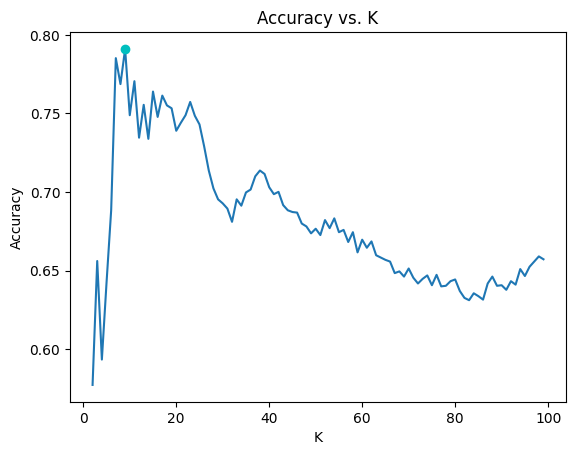

In [ ]:
print("The Maximum accuracy is for k={0} with acc={1}".format(K[np.argmax(accuracies)],np.max(accuracies)))
fig, ax = plt.subplots()
plt.plot(K, accuracies)
plt.plot(K[np.argmax(accuracies)],np.max(accuracies),'co')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K')
# plt.legend()
plt.show()

Test AUC: 0.7986175872465239
Test Recall: 0.7910557184750733
Test F1-score: 0.7910557184750733
Test Precision: 0.7910557184750733
Confusion Matrix:


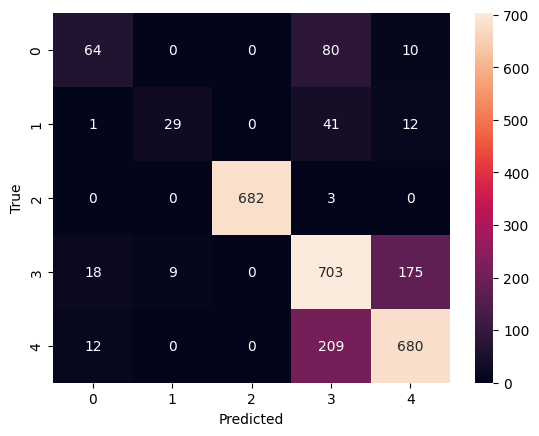

In [ ]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, confusion_matrix
from keras.utils import to_categorical

knn1 = KNNClassifier(k=9)
knn1.fit(X_train,y_train)
y_pred = knn1.predict(X_test)

y_pred_classes = np.round(y_pred)
y_pred_classes = to_categorical(y_pred_classes, 5)
y_test_classes= to_categorical(y_test, 5)

auc_score = roc_auc_score(y_test_classes, y_pred_classes, multi_class='ovr')
recall = recall_score(y_test_classes, y_pred_classes, average='micro')
f1 = f1_score(y_test_classes, y_pred_classes, average='micro')
precision = precision_score(y_test_classes, y_pred_classes, average='micro')
print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

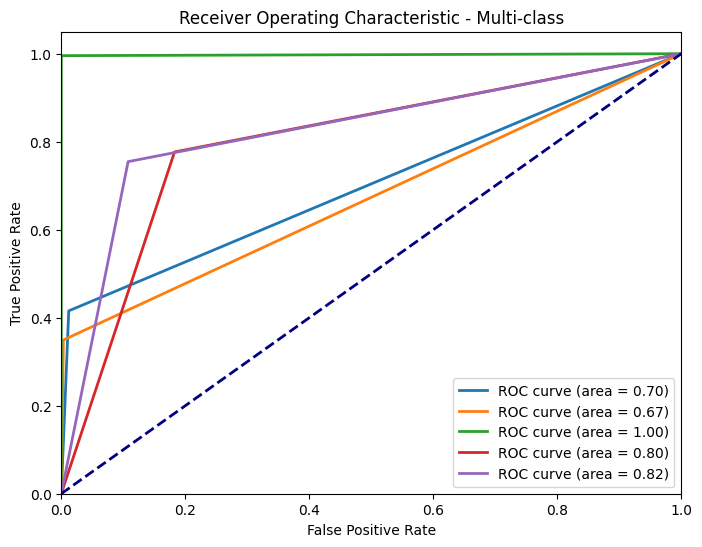

In [ ]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_classes[:, i], y_pred_classes[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Multi-class')
plt.legend(loc='lower right')
plt.show()

# NN

In [15]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

input_shape=x_train[0].shape

num_classes = np.unique(y).shape[0]
print(num_classes)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=input_shape))
model.add(Dense(16,activation='elu'))
model.add(Dense(8,activation='elu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

from keras.callbacks import  ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.9,
                              patience=2,
                              min_lr=0.00001, verbose=1)


import keras
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

start_time = time.time()

history= model.fit(x_train, y_train , batch_size=32, epochs=30, validation_data=(x_test, y_test), callbacks=[reduce_lr])

end_time = time.time()
training_time = end_time - start_time
print("Training Time: {:.2f} seconds".format(training_time))

5
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                224       
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dense_15 (Dense)            (None, 5)                 45        
                                                                 
Total params: 933
Trainable params: 933
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
597/597 [==============================] - 3s 5ms/step - loss: 0.4634 - accuracy: 0.8038 - val_loss: 0.1470 - val_accuracy: 0.9365 - lr: 0.0100
Epoch 2/30
597/597 [===========

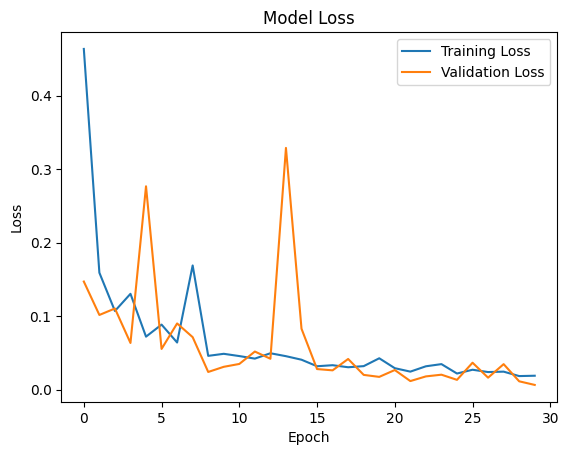

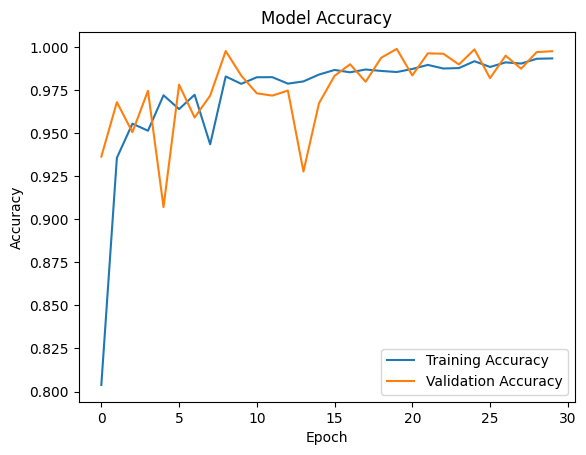

256/256 [==============================] - 1s 2ms/step - loss: 0.0065 - accuracy: 0.9977
Test loss: 0.006480317562818527
Test accuracy: 0.9976783990859985


In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss, accuracy = model.evaluate(x_test, y_test, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

256/256 [==============================] - 0s 1ms/step
Test AUC: 0.9989341880154413
Test Recall: 0.9976783968719453
Test F1-score: 0.9976783968719453
Test Precision: 0.9976783968719453
Confusion Matrix:


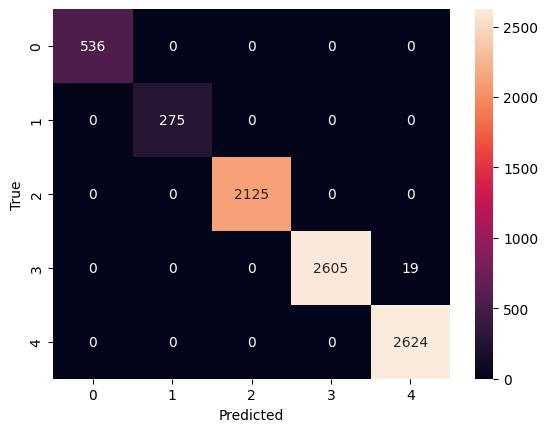

In [17]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, confusion_matrix

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)

from keras.utils import to_categorical
y_test_classes= to_categorical(y_test, num_classes)
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
auc_score = roc_auc_score(y_test_classes, y_pred_classes, multi_class='ovr')
recall = recall_score(y_test_classes, y_pred_classes, average='micro')
f1 = f1_score(y_test_classes, y_pred_classes, average='micro')
precision = precision_score(y_test_classes, y_pred_classes, average='micro')
print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)

y_test_bin = np.argmax(y_test_classes, axis=1)
y_pred_bin = np.argmax(y_pred_classes, axis=1)
cm = confusion_matrix(y_test_bin, y_pred_bin)
print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

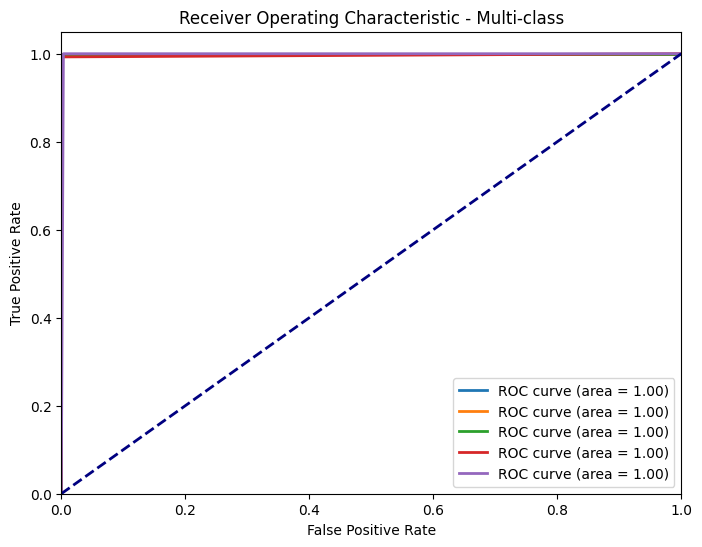

In [21]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_classes[:, i], y_pred_classes[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Multi-class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from tensorflow.keras import backend as K
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting library

# Get the intermediate output
intermediate_layer_model = Model(inputs=model.input, outputs=model.layers[-1].output)
intermediate_output_train = intermediate_layer_model.predict(x_train)
intermediate_output_test = intermediate_layer_model.predict(x_test)

# Concatenate train and test intermediate outputs for t-SNE visualization
tsne_input = np.concatenate((intermediate_output_train, intermediate_output_test), axis=0)
tsne_labels = np.concatenate((y_train, y_test), axis=0)

# Apply t-SNE for dimensionality reduction in 3D
tsne = TSNE(n_components=3, random_state=42)
tsne_result_nn = tsne.fit_transform(tsne_input)


256/256 [==============================] - 1s 2ms/step


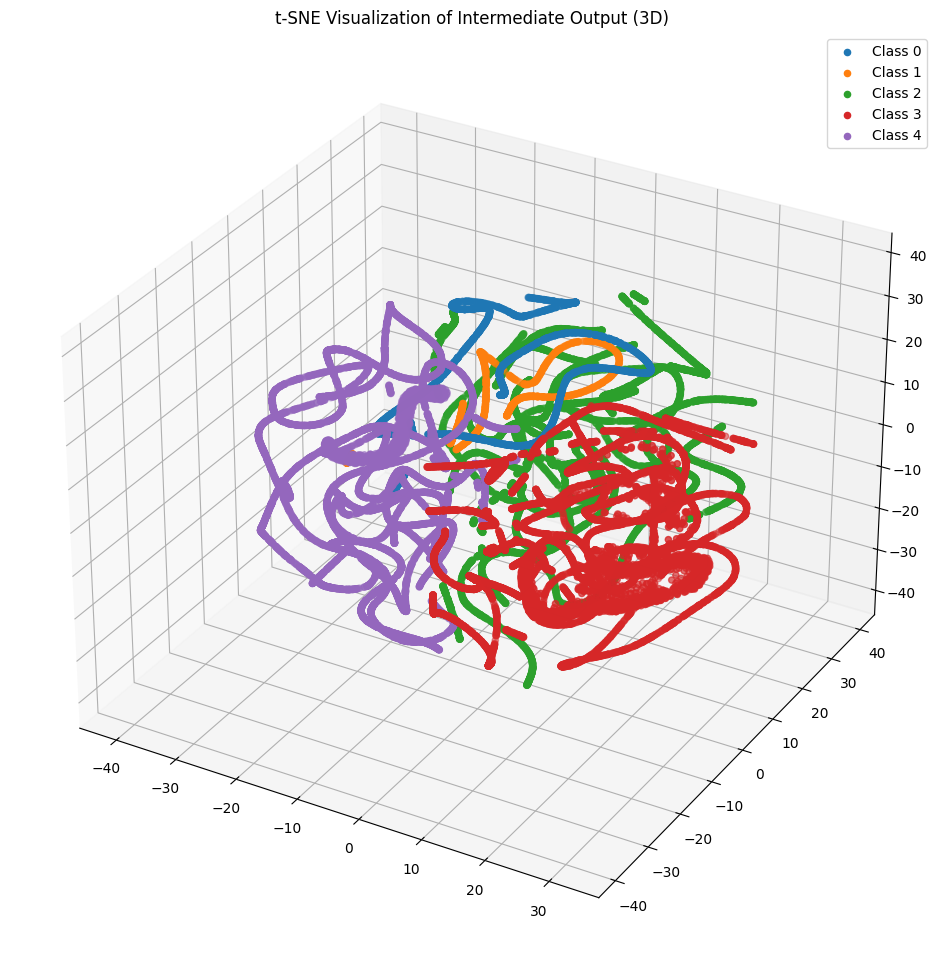

In [ ]:

# Plot the t-SNE results in 3D
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

for i in range(num_classes):
    ax.scatter(tsne_result_nn[tsne_labels == i, 0], tsne_result_nn[tsne_labels == i, 1], tsne_result_nn[tsne_labels == i, 2], label=f'Class {i}')

ax.set_title('t-SNE Visualization of Intermediate Output (3D)')
ax.legend()
plt.show()

## NN on LDA

In [26]:
import numpy as np
from tensorflow.keras.models import Sequential
x_train, x_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=21)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


input_shape=x_train[0].shape

num_classes = np.unique(y).shape[0]

model = Sequential()
model.add(Dense(64, activation='elu', input_shape=input_shape))
model.add(Dense(32,activation='elu'))
model.add(Dense(16,activation='elu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

from keras.callbacks import  ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.8,
                              patience=3,
                              min_lr=0.00001, verbose=1)

# Define the optimizer and compile the model
import keras
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

start_time = time.time()

history= model.fit(x_train, y_train , batch_size=32, epochs=100, validation_data=(x_test, y_test), callbacks=[reduce_lr])

# Calculate the elapsed time
end_time = time.time()
training_time = end_time - start_time
print("Training Time: {:.2f} seconds".format(training_time))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                192       
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dense_21 (Dense)            (None, 5)                 85        
                                                                 
Total params: 2,885
Trainable params: 2,885
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
597/597 [==============================] - 4s 5ms/step - loss: 0.7087 - accuracy: 0.6687 - val_loss: 0.6553 - val_accuracy: 0.6861 - lr: 0.0100
Epoch 2/100
597/597 [=======

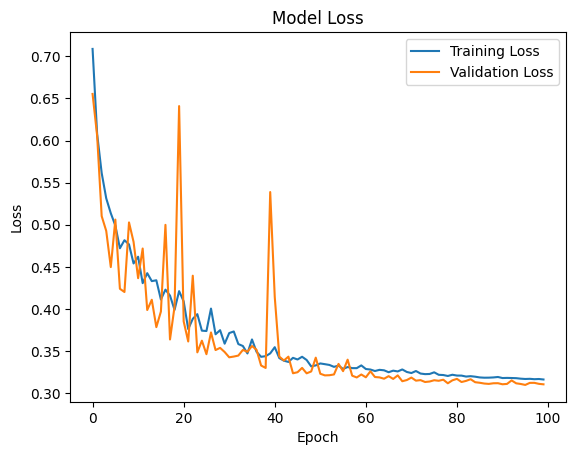

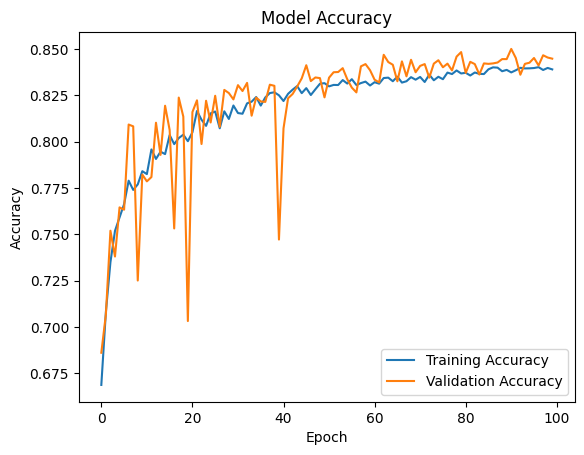

256/256 [==============================] - 1s 2ms/step - loss: 0.3107 - accuracy: 0.8448
Test loss: 0.3106555640697479
Test accuracy: 0.844819188117981


In [28]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss, accuracy = model.evaluate(x_test, y_test, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

256/256 [==============================] - 0s 1ms/step
Test AUC: 0.9287139787155955
Test Recall: 0.8448191593352884
Test F1-score: 0.8448707765625955
Test Precision: 0.8449224000977636
Confusion Matrix:


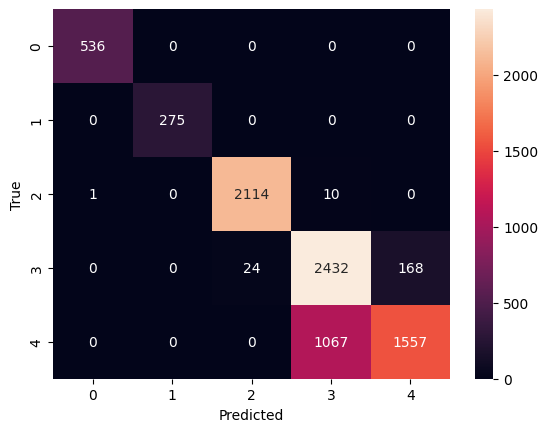

In [29]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, confusion_matrix
# Evaluate the model on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)
# print(y_pred_classes)
from keras.utils import to_categorical
y_test_classes= to_categorical(y_test, num_classes)
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
auc_score = roc_auc_score(y_test_classes, y_pred_classes, multi_class='ovr')
recall = recall_score(y_test_classes, y_pred_classes, average='micro')
f1 = f1_score(y_test_classes, y_pred_classes, average='micro')
precision = precision_score(y_test_classes, y_pred_classes, average='micro')
print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)

y_test_bin = np.argmax(y_test_classes, axis=1)
y_pred_bin = np.argmax(y_pred_classes, axis=1)
cm = confusion_matrix(y_test_bin, y_pred_bin)
print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

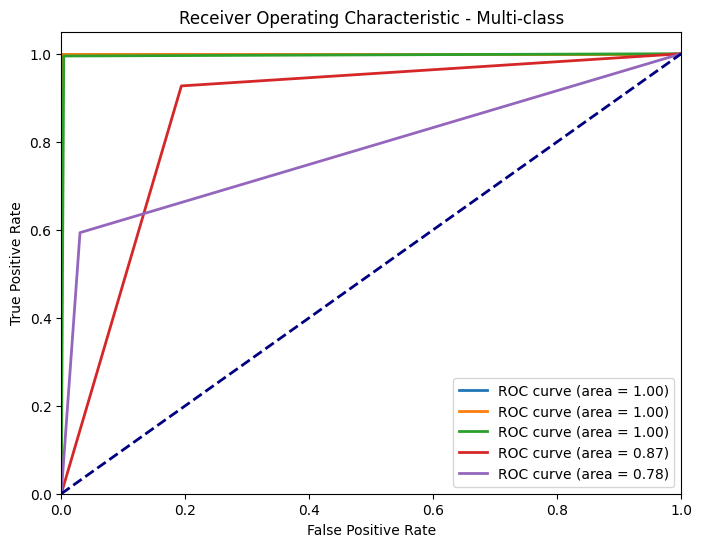

In [30]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_classes[:, i], y_pred_classes[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Multi-class')
plt.legend(loc='lower right')
plt.show()

# Transformer

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Normalize the input features
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the Transformer Encoder architecture
def transformer_encoder(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Dense(64, activation='elu')(inputs)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='elu')(x)
    x = Dropout(0.2)(x)
    x = Dense(16, activation='elu')(x)
    x = Dropout(0.2)(x)
    x = Dense(8, activation='elu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define the model
input_shape = x_train.shape[1:]
num_classes = len(np.unique(y))
model = transformer_encoder(input_shape, num_classes)
model.summary()

# Compile the model
optimizer = Adam(learning_rate=0.008)
model.compile(loss=SparseCategoricalCrossentropy(), optimizer=optimizer, metrics=[SparseCategoricalAccuracy()])

# Define early stopping criteria
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, batch_size=16, epochs=100, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


In [ ]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over epochs
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# loss, accuracy = model.evaluate(x_test, y_test, batch_size=32)
# print('Test loss:', loss)
# print('Test accuracy:', accuracy)

In [ ]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, confusion_matrix
# Evaluate the model on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)
# print(y_pred_classes)
from keras.utils import to_categorical
y_test_classes= to_categorical(y_test, num_classes)
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
auc_score = roc_auc_score(y_test_classes, y_pred_classes, multi_class='ovr')
recall = recall_score(y_test_classes, y_pred_classes, average='micro')
f1 = f1_score(y_test_classes, y_pred_classes, average='micro')
precision = precision_score(y_test_classes, y_pred_classes, average='micro')
print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)

y_test_bin = np.argmax(y_test_classes, axis=1)
y_pred_bin = np.argmax(y_pred_classes, axis=1)
cm = confusion_matrix(y_test_bin, y_pred_bin)
print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.savefig('conf.pdf')
plt.show()

# CNN

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(6, 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 2, activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

from keras.callbacks import  ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.9,
                              patience=3,
                              min_lr=0.00001, verbose=1)

import keras
opt = keras.optimizers.Adam(learning_rate=0.006)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

start_time = time.time()

history = model.fit(x_train, y_train, batch_size=32, epochs=30, validation_data=(x_test, y_test), callbacks=[reduce_lr])

end_time = time.time()
training_time = end_time - start_time
print("Training Time: {:.2f} seconds".format(training_time))

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_23 (Conv1D)          (None, 4, 64)             256       
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 2, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_24 (Conv1D)          (None, 1, 32)             4128      
                                                                 
 flatten_11 (Flatten)        (None, 32)                0         
                                                                 
 dense_45 (Dense)            (None, 16)                528       
                                                                 
 dense_46 (Dense)            (None, 5)                 85        
                                                     

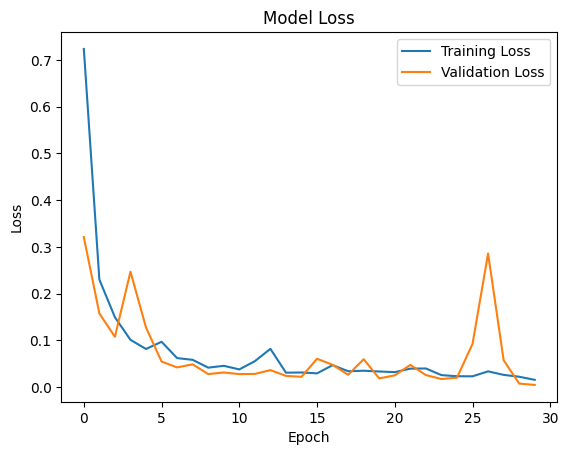

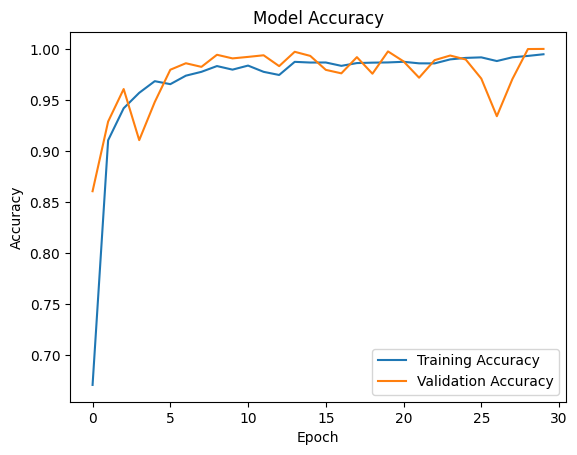

256/256 [==============================] - 1s 3ms/step - loss: 0.0045 - accuracy: 1.0000
Test loss: 0.004513460677117109
Test accuracy: 1.0


In [62]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss, accuracy = model.evaluate(x_test, y_test, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

256/256 [==============================] - 0s 2ms/step
Test AUC: 1.0
Test Recall: 1.0
Test F1-score: 1.0
Test Precision: 1.0
Confusion Matrix:


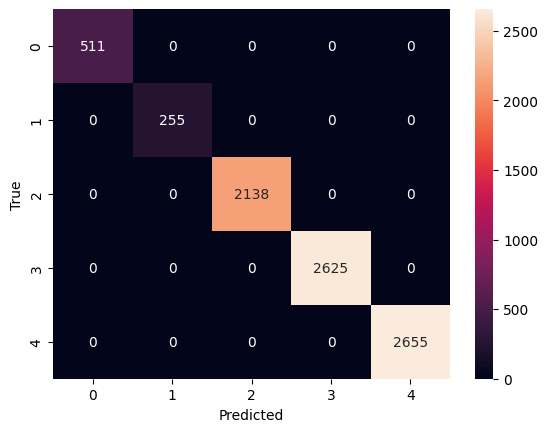

In [63]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, confusion_matrix
# Evaluate the model on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)

from keras.utils import to_categorical
y_test_classes= to_categorical(y_test, num_classes)
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
auc_score = roc_auc_score(y_test_classes, y_pred_classes, multi_class='ovr')
recall = recall_score(y_test_classes, y_pred_classes, average='micro')
f1 = f1_score(y_test_classes, y_pred_classes, average='micro')
precision = precision_score(y_test_classes, y_pred_classes, average='micro')
print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)

y_test_bin = np.argmax(y_test_classes, axis=1)
y_pred_bin = np.argmax(y_pred_classes, axis=1)
cm = confusion_matrix(y_test_bin, y_pred_bin)
print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

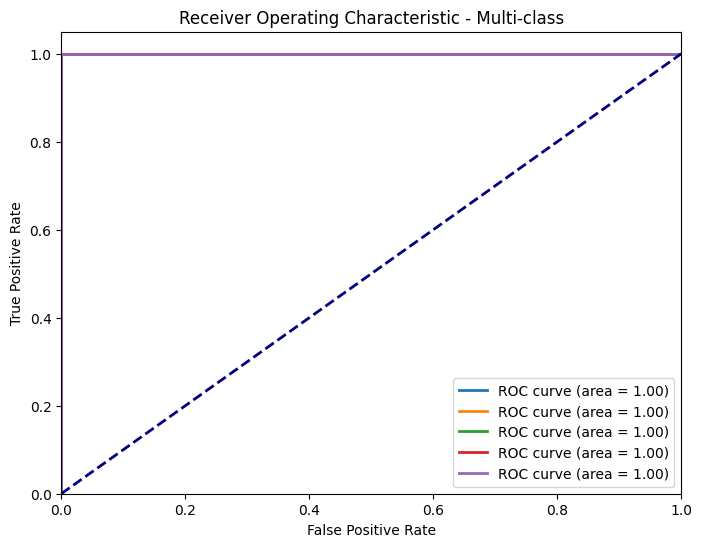

In [64]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_classes[:, i], y_pred_classes[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Multi-class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from tensorflow.keras import backend as K
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting library
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

# Get the intermediate output
intermediate_layer_model = Model(inputs=model.input, outputs=model.layers[-1].output)
intermediate_output_train = intermediate_layer_model.predict(x_train)
intermediate_output_test = intermediate_layer_model.predict(x_test)

# Concatenate train and test intermediate outputs for t-SNE visualization
tsne_input = np.concatenate((intermediate_output_train, intermediate_output_test), axis=0)
tsne_labels = np.concatenate((y_train, y_test), axis=0)

# Apply t-SNE for dimensionality reduction in 3D
tsne = TSNE(n_components=3, random_state=42)
tsne_result_cnn = tsne.fit_transform(tsne_input)

256/256 [==============================] - 0s 2ms/step


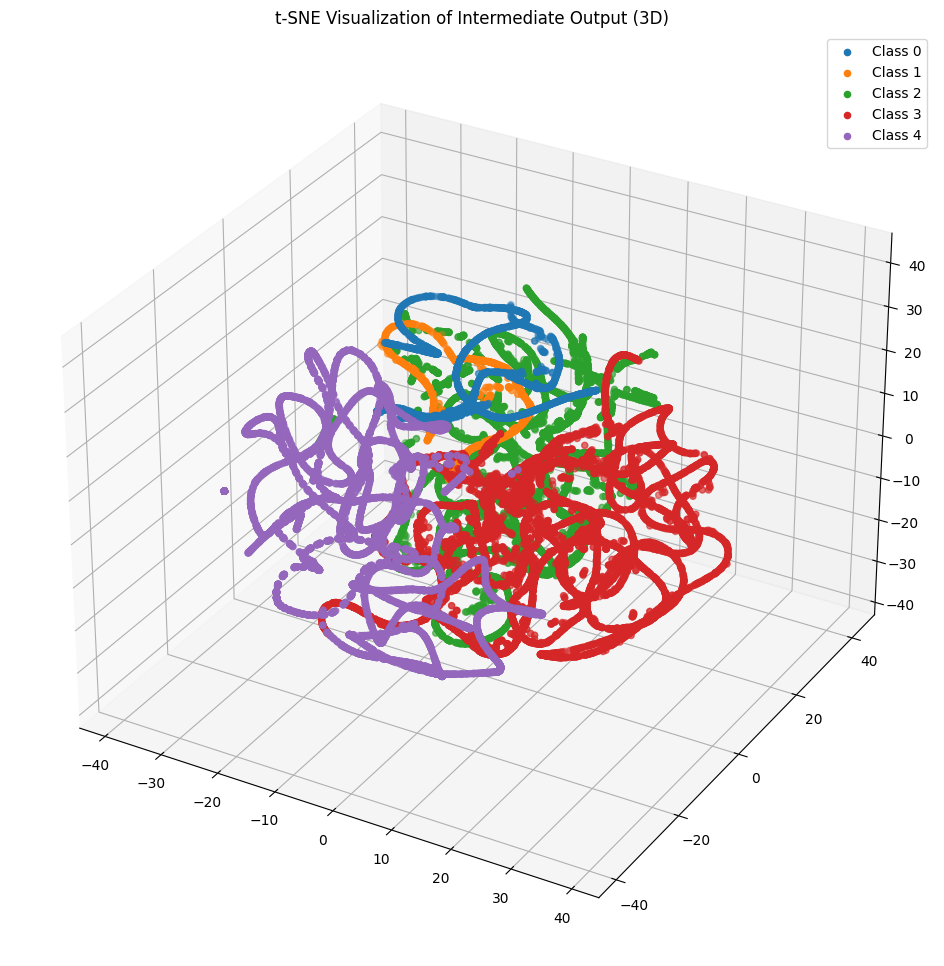

In [ ]:

# Plot the t-SNE results in 3D
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

for i in range(num_classes):
    ax.scatter(tsne_result_cnn[tsne_labels == i, 0], tsne_result_cnn[tsne_labels == i, 1], tsne_result_cnn[tsne_labels == i, 2], label=f'Class {i}')

ax.set_title('t-SNE Visualization of Intermediate Output (3D)')
ax.legend()
plt.show()

# LSTM+CNN

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout
from keras.regularizers import l2
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(6, 1)))
model.add(MaxPooling1D(2))
model.add(LSTM(16, kernel_regularizer=l2(0.001),bias_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

from keras.callbacks import  ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.8,
                              patience=3,
                              min_lr=0.0001, verbose=1)

# Define the optimizer and compile the model
import keras
opt = keras.optimizers.Adam(learning_rate=0.04)

# Compile and train the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

start_time = time.time()

history = model.fit(x_train, y_train, batch_size=32, epochs=40, validation_data=(x_test, y_test), callbacks=[reduce_lr])

# Calculate the elapsed time
end_time = time.time()
training_time = end_time - start_time
print("Training Time: {:.2f} seconds".format(training_time))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 4, 32)             128       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 2, 32)            0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                                 
 dense_30 (Dense)            (None, 5)                 85        
                                                                 
Total params: 3,349
Trainable params: 3,349
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
597/597 [==============================] - 7s 7ms/step - loss: 0.7486 - accuracy: 0.6866 - val_loss: 0.456

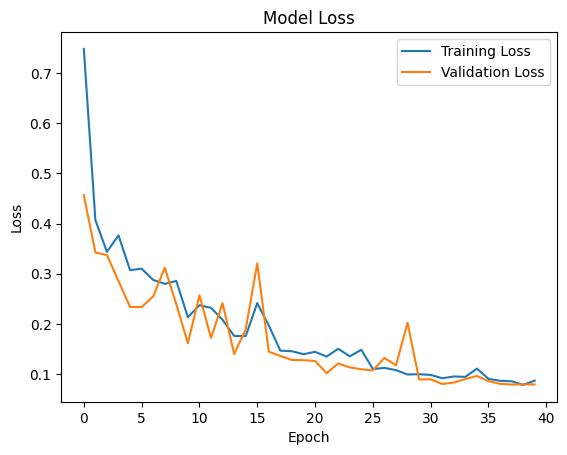

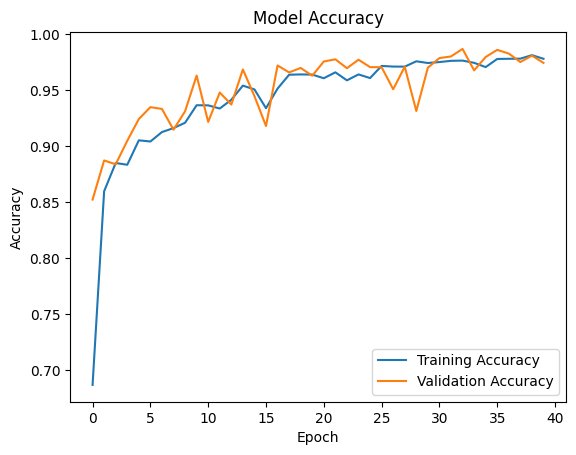

256/256 [==============================] - 1s 4ms/step - loss: 0.0789 - accuracy: 0.9745
Test loss: 0.07885248214006424
Test accuracy: 0.9744623899459839


In [44]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss, accuracy = model.evaluate(x_test, y_test, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

256/256 [==============================] - 1s 2ms/step
Test AUC: 0.9879449229854526
Test Recall: 0.9740957966764419
Test F1-score: 0.9756455758169135
Test Precision: 0.9772002941897524
Confusion Matrix:


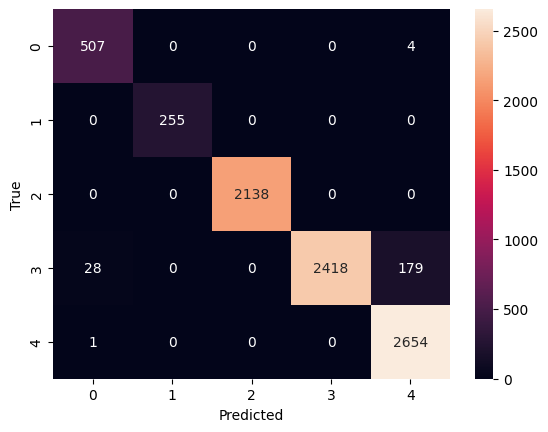

In [45]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, confusion_matrix

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)
from keras.utils import to_categorical
y_test_classes= to_categorical(y_test, num_classes)
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
auc_score = roc_auc_score(y_test_classes, y_pred_classes, multi_class='ovr')
recall = recall_score(y_test_classes, y_pred_classes, average='micro')
f1 = f1_score(y_test_classes, y_pred_classes, average='micro')
precision = precision_score(y_test_classes, y_pred_classes, average='micro')
print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)

y_test_bin = np.argmax(y_test_classes, axis=1)
y_pred_bin = np.argmax(y_pred_classes, axis=1)
cm = confusion_matrix(y_test_bin, y_pred_bin)
print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

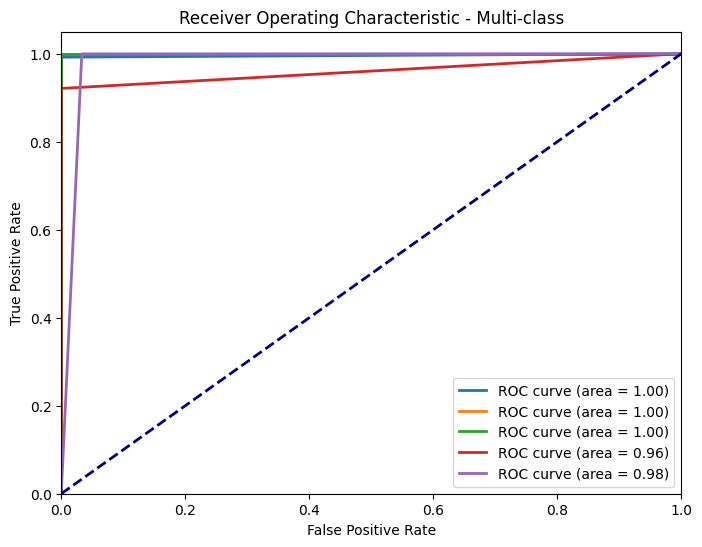

In [46]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_classes[:, i], y_pred_classes[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Multi-class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from tensorflow.keras import backend as K
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting library
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

# Get the intermediate output
intermediate_layer_model = Model(inputs=model.input, outputs=model.layers[-1].output)
intermediate_output_train = intermediate_layer_model.predict(x_train)
intermediate_output_test = intermediate_layer_model.predict(x_test)

# Concatenate train and test intermediate outputs for t-SNE visualization
tsne_input = np.concatenate((intermediate_output_train, intermediate_output_test), axis=0)
tsne_labels = np.concatenate((y_train, y_test), axis=0)

# Apply t-SNE for dimensionality reduction in 3D
tsne = TSNE(n_components=3, random_state=42)
tsne_result = tsne.fit_transform(tsne_input)

256/256 [==============================] - 1s 3ms/step


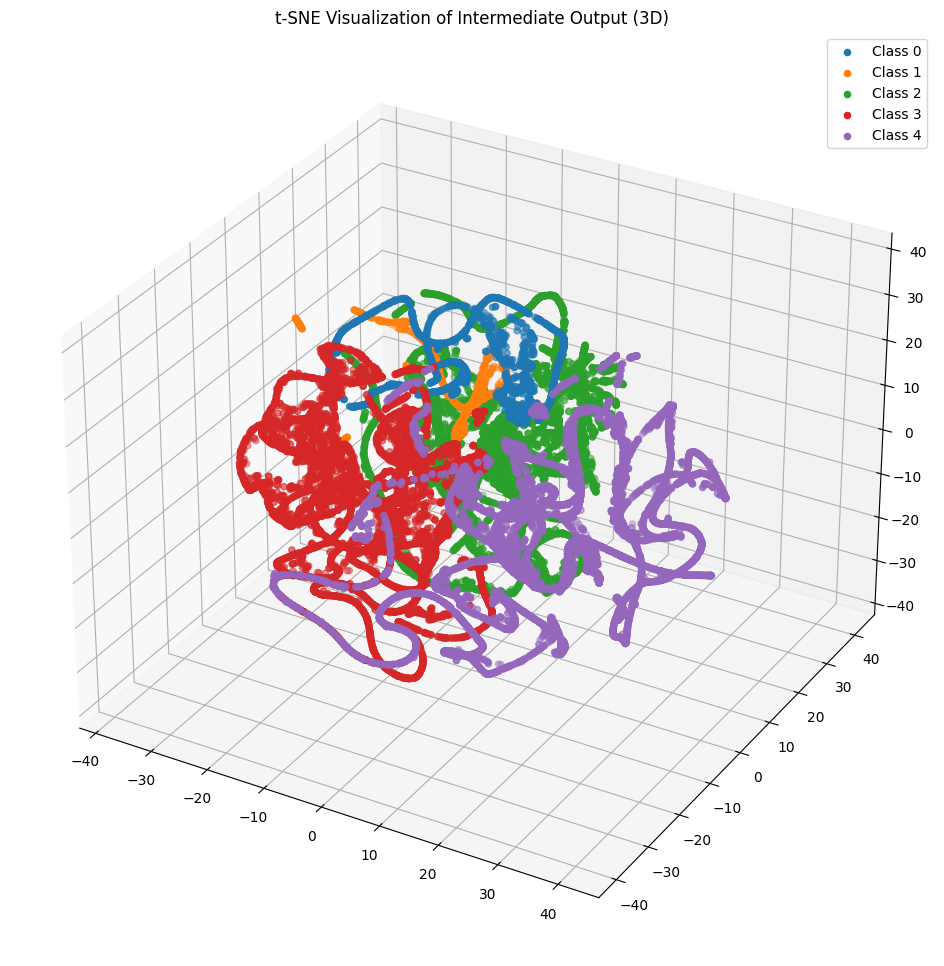

In [ ]:

# Plot the t-SNE results in 3D
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

for i in range(num_classes):
    ax.scatter(tsne_result[tsne_labels == i, 0], tsne_result[tsne_labels == i, 1], tsne_result[tsne_labels == i, 2], label=f'Class {i}')

ax.set_title('t-SNE Visualization of Intermediate Output (3D)')
ax.legend()
plt.show()